# Computing presentations of graph braid groups with `graph-morse`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graph_utils import *
from morse_utils import *

A graph and its spanning tree is encoded as its adjacency matrix where the $-1$ entries mark the deleted edges, i.e. edges which are not included in the spanning tree.

Let's load graph $K_4$ whcih is the complete graph spanned on $4$ verices.

In [2]:
graph = load_graph_from_dataset( 'K4', subdivision = 2 )
print(
    graph
)

[[ 0  1 -1 -1]
 [ 1  0  1 -1]
 [-1  1  0  1]
 [-1 -1  1  0]]


The subdivision argument refers to the subdivision of graph's edges with respect to the number of particles we are going to put on the graph. For example, `subdivision = 3` means that the loaded graph is **sufficiently subdivided** for $3$ particles. See [README](README.md) for references. 

Let's plot the graph.

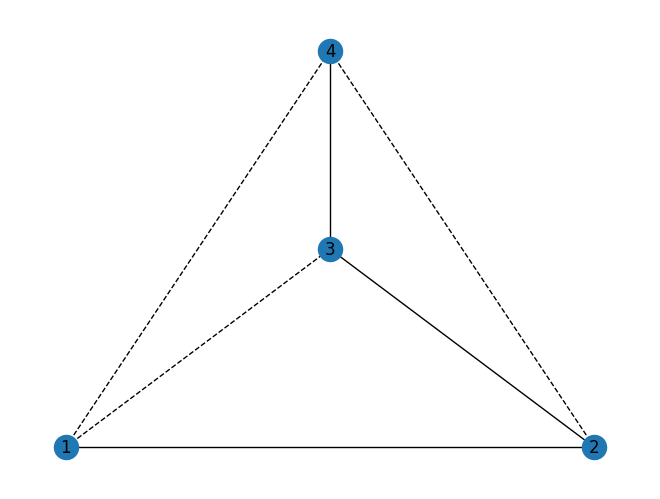

In [3]:
plot_graph(graph)

The spanning tree is denoted by solid edges while the deleted edges are dashed.

Let's generate the corresponding Morse presentation of the graph braid group.

In [4]:
gens, rels = graph_braid_group(graph, n_particles=2)

In [5]:
print("Generators:")
for i in range(len(gens)):
    print(
        'g'+str(i)+' = '+str(gens[i])
    )
print('\n')   
print("Relators:")
for rel in rels:
    print( rel )

Generators:
g0 = ((2, 4), 1)
g1 = ((1, 3), 2)
g2 = ((2, 4), 3)
g3 = ((1, 3), 4)
g4 = ((1, 4), 2)


Relators:
[('g1', 1), ('g0', -1), ('g3', -1), ('g2', 1)]


The output says that

$Br_2(K_4)=\left\langle g_0,\, g_1,\, g_2,\, g_3,\, g_4|\, g_1g_0^{-1}g_3^{-1}g_2 \right\rangle$.

The generators are the critical $1$-cells of the discrete Morse complex listed in the output.

After Tietze transformation $g_0 \to g_3^{-1}g_2g_1$  we get
$Br_2(K_4)=\left\langle g_1,\, g_2,\, g_3,\, g_4 \right\rangle \cong F_4$.

## The graph $\Theta_4$

Let us next consider a more complicated example. Namely, we will reproduce the results presented in the Appendix of the paper [An, B.H., Maciazek, T. Geometric Presentations of Braid Groups for Particles on a Graph. Commun. Math. Phys. 384, 1109–1140 (2021)](https://link.springer.com/article/10.1007/s00220-021-04095-x).

The goal is to find a Morse presentation for $Br_3(\Theta_4)$.

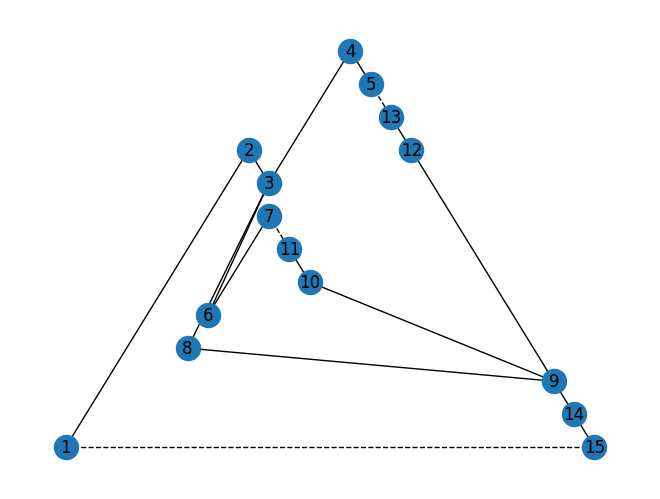

In [6]:
graph = load_graph_from_dataset( 'Theta4_CMP', subdivision = 3 )
plot_graph(graph)

In [7]:
gens, rels = graph_braid_group(graph, n_particles=3)

In [8]:
print("Generators:")
for i in range(len(gens)):
    print(
        'g'+str(i)+' = '+str(gens[i])
    )
print('\n')   
print("Relators:")
for rel in rels:
    print( rel )

Generators:
g0 = ((1, 15), 2, 3)
g1 = ((9, 14), 12, 15)
g2 = ((3, 8), 6, 7)
g3 = ((9, 14), 10, 11)
g4 = ((3, 6), 1, 4)
g5 = ((9, 12), 10, 13)
g6 = ((9, 12), 1, 10)
g7 = ((7, 11), 1, 2)
g8 = ((5, 13), 1, 2)
g9 = ((3, 8), 1, 4)
g10 = ((3, 8), 4, 6)
g11 = ((3, 8), 4, 9)
g12 = ((3, 8), 6, 9)
g13 = ((3, 6), 4, 8)
g14 = ((9, 14), 1, 10)
g15 = ((3, 6), 4, 5)
g16 = ((9, 14), 12, 13)
g17 = ((3, 8), 4, 5)
g18 = ((3, 8), 1, 6)
g19 = ((9, 12), 10, 14)
g20 = ((9, 14), 10, 12)
g21 = ((9, 12), 10, 11)
g22 = ((9, 14), 10, 15)
g23 = ((9, 14), 1, 12)
g24 = ((3, 6), 4, 7)


Relators:
[('g0', 1), ('g23', -1), ('g0', -1), ('g1', 1)]
[('g0', 1), ('g6', -1), ('g0', -1), ('g19', 1)]
[('g17', 1), ('g8', -1), ('g11', -1), ('g8', 1), ('g9', -1)]
[('g7', 1), ('g18', -1), ('g12', -1), ('g14', -1), ('g12', 1), ('g18', 1), ('g7', -1), ('g14', -1), ('g3', 1)]
[('g0', 1), ('g7', -1), ('g0', -1), ('g14', 1), ('g7', 1), ('g18', -1)]
[('g8', 1), ('g4', -1), ('g7', -1), ('g9', 1), ('g8', -1), ('g6', 1), ('g7', 1), ('g18',

This looks really complictated! Fortunately, as shown in the paper, the above presentation can be simplified to show that the group $Br_3(\Theta_4)$ is isomorphic to the fundamental group of a two-dimensional surface of genus three (the so-called triple torus). What is more, all the above generators have nice geometric interpretations as certain exchange processes on the graph.

## The lasso graph
Let us next consider a subdivided lasso graph and put $N=2$ particles on it. 

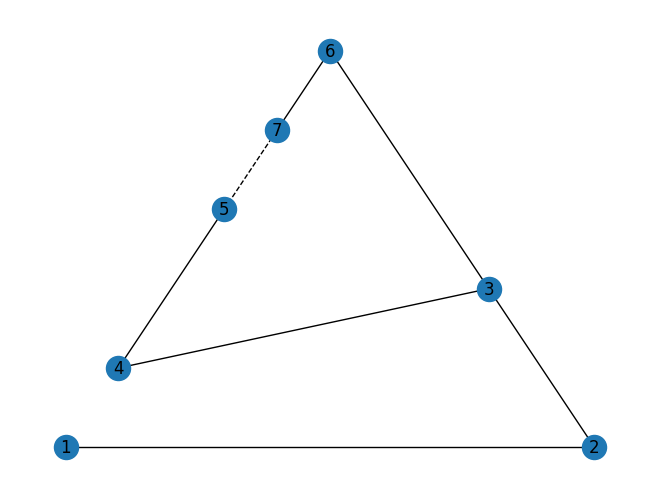

In [13]:
graph = load_graph_from_dataset( 'Lasso', subdivision = 3 )
plot_graph(graph)

Find the critical 1-cells, i.e., the generators of $Br_2(\Gamma)$.

In [14]:
cells1 = find_crit_cells(graph, dim=1, Npart=2)
gens = list(cells1)
print(gens)

[((3, 6), 4), ((5, 7), 1)]


Let's find the Morse image of the redundant cell $((5, 7), 6)$.

In [15]:
cell = ((5, 7), 6)
letts, exps = [cell], [1]
morse = find_morse_image(letts, exps, gens, graph)
print(morse)

([((5, 7), 1), ((3, 6), 4)], [1, -1])


So, we have that $((5, 7), 6)^1\to ((5, 7), 6)^1\cdotp ((3, 6), 4)^{-1}$ in the Morse complex.